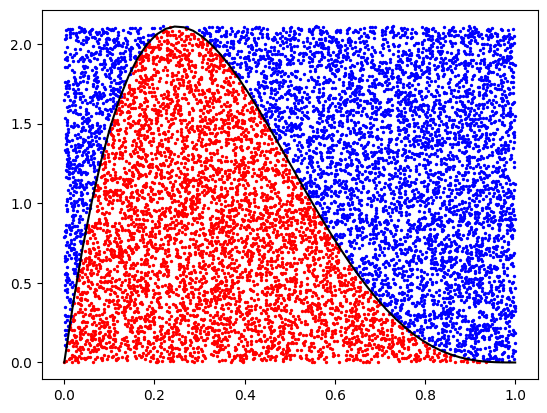

Integral aproximada:  1.0008984298870043


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import math

def random_sequence(size, inf_lim, sup_lim, x0, a=25214903917, m=2**48, c=11):
    sequence = np.zeros(size, dtype=float)
    for i in range(size):
        x0 = (a * x0 + c) % m
        sequence[i] = x0
    sequence /= float(m)
    return inf_lim + (sup_lim - inf_lim) * sequence

def function(x, alpha=2, beta=4):
    num = math.factorial(alpha + beta - 1) / (math.factorial(alpha - 1) * math.factorial(beta - 1))
    num *= x ** (alpha - 1)
    num *= (1 - x) ** (beta - 1)
    return num

def integral(a, b, fun, n_points):
    x = random_sequence(n_points, a, b, rnd.random())
    maxi = np.max(fun(x))
    y = random_sequence(n_points, 0, maxi, rnd.random())
    area = (b - a) * maxi
    integral = len(x[y < fun(x)]) * area / n_points
    return integral, x[y < fun(x)], y[y < fun(x)], x[y >= fun(x)], y[y >= fun(x)]

inte, x, y, x2, y2 = integral(0, 1, function, 10000)
x0 = np.linspace(0, 1, 50)
plt.scatter(x, y, color="r",s=2)
plt.scatter(x2, y2, color="b",s=2)
plt.plot(x0, function(x0), color="black")
plt.show()
print("Integral aproximada: ", inte)
